In [1]:
#Task...bulding a bank_marketing_response prediction 
#dataset...https://www.kaggle.com/dhirajnirne/bank-marketing

In [2]:
#import neccesary models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/bank-marketing/bank-marketing.csv')
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [4]:
#exploring the dataset
df.shape

(45211, 23)

In [5]:
df.isnull().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [6]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [7]:
df.head(3)

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0


In [8]:
#dropping some unneccesary columns
df1=df.drop(['age group','eligible','default','day','month'],axis=1)
df1.head(3)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,response
0,58,management,100000,married,tertiary,married-tertiary,yes,2143,yes,no,unknown,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,single-secondary,yes,29,yes,no,unknown,151,1,-1,0,unknown,no,0
2,33,entrepreneur,120000,married,secondary,married-secondary,yes,2,yes,yes,unknown,76,1,-1,0,unknown,no,0


In [9]:
df1.groupby('job')['job'].agg('count')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [10]:
df1.salary.unique()

array([100000,  60000, 120000,  20000,      0,  55000,  50000,  70000,
         8000,  16000,   4000], dtype=int64)

In [11]:
df1.groupby('salary')['salary'].agg('count')

salary
0          288
4000       938
8000      1303
16000     1240
20000     9732
50000     5171
55000     2264
60000     9176
70000     4154
100000    9458
120000    1487
Name: salary, dtype: int64

In [12]:
df1[df1.salary<=0].head(5)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,response
4,33,unknown,0,single,unknown,single-unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,0
216,47,unknown,0,married,unknown,married-unknown,no,28,no,no,unknown,338,2,-1,0,unknown,no,0
354,59,unknown,0,divorced,unknown,divorced-unknown,no,27,no,no,unknown,347,3,-1,0,unknown,no,0
876,37,unknown,0,single,unknown,single-unknown,no,414,yes,no,unknown,131,1,-1,0,unknown,no,0
1072,29,unknown,0,single,primary,single-primary,yes,50,yes,no,unknown,50,2,-1,0,unknown,no,0


In [13]:
#i'm just gonna filter all these rows with unknown type of job and with 0 salary,for a better training dataset 
df2=df1[(df1.salary>0)]
df2.shape

(44923, 18)

In [14]:
df2.groupby('salary')['salary'].agg('count')

salary
4000       938
8000      1303
16000     1240
20000     9732
50000     5171
55000     2264
60000     9176
70000     4154
100000    9458
120000    1487
Name: salary, dtype: int64

In [15]:
df2.head(2)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,response
0,58,management,100000,married,tertiary,married-tertiary,yes,2143,yes,no,unknown,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,single-secondary,yes,29,yes,no,unknown,151,1,-1,0,unknown,no,0


In [16]:
df2.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [17]:
df2.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [18]:
df2.groupby('education')['education'].agg('count')

education
primary       6800
secondary    23131
tertiary     13262
unknown       1730
Name: education, dtype: int64

In [19]:
#filtering the unknown rows in education column
#i will drop these rows
df2[df2.education=='unknown'].head(5)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,response
3,47,blue-collar,20000,married,unknown,married-unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,0
13,58,technician,60000,married,unknown,married-unknown,no,71,yes,no,unknown,71,1,-1,0,unknown,no,0
16,45,admin.,50000,single,unknown,single-unknown,no,13,yes,no,unknown,98,1,-1,0,unknown,no,0
42,60,blue-collar,20000,married,unknown,married-unknown,no,104,yes,no,unknown,22,1,-1,0,unknown,no,0
44,58,retired,55000,married,unknown,married-unknown,no,96,yes,no,unknown,616,1,-1,0,unknown,no,0


In [20]:
df3=df2[df2.education !='unknown']
df3.shape

(43193, 18)

In [21]:
df3.groupby('education')['education'].agg('count')

education
primary       6800
secondary    23131
tertiary     13262
Name: education, dtype: int64

In [22]:
df3.head(3)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,response
0,58,management,100000,married,tertiary,married-tertiary,yes,2143,yes,no,unknown,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,single-secondary,yes,29,yes,no,unknown,151,1,-1,0,unknown,no,0
2,33,entrepreneur,120000,married,secondary,married-secondary,yes,2,yes,yes,unknown,76,1,-1,0,unknown,no,0


In [23]:
df3['marital-education'].unique()

array(['married-tertiary', 'single-secondary', 'married-secondary',
       'single-tertiary', 'divorced-tertiary', 'married-primary',
       'divorced-secondary', 'single-primary', 'divorced-primary'],
      dtype=object)

In [24]:
df3[df3.balance<=0]
#for the remaining amount of balance in their bank accounts,it seems so unreal to have a negative balance,so i'm gonna filter
#all these values which are less than 0 
df4=df3[df3.balance>0]
df4.shape

(36193, 18)

In [25]:
df4.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
df4.groupby('contact')['contact'].agg('count')

contact
cellular     23812
telephone     2320
unknown      10061
Name: contact, dtype: int64

In [27]:
#i'm gonna replace all unknown contacts with the mode value
df4.contact=df4.contact.replace(['unknown'],['cellular'])

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df4.groupby('contact')['contact'].agg('count')

contact
cellular     33873
telephone     2320
Name: contact, dtype: int64

In [29]:
df4.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'marital-education',
       'targeted', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [30]:
df4[df4.duration<=0]
df5=df4[df4.duration>0]
df5.shape

(36190, 18)

In [31]:
#i will also drop extra columns..pdays,previous,poutcome
df6=df5.drop(['poutcome','previous','pdays'],axis='columns')
df6.shape

(36190, 15)

In [32]:
df6.head()

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,y,response
0,58,management,100000,married,tertiary,married-tertiary,yes,2143,yes,no,cellular,261,1,no,0
1,44,technician,60000,single,secondary,single-secondary,yes,29,yes,no,cellular,151,1,no,0
2,33,entrepreneur,120000,married,secondary,married-secondary,yes,2,yes,yes,cellular,76,1,no,0
5,35,management,100000,married,tertiary,married-tertiary,yes,231,yes,no,cellular,139,1,no,0
6,28,management,100000,single,tertiary,single-tertiary,no,447,yes,yes,cellular,217,1,no,0


In [33]:
#no more missing values
#next we handle outliers

In [34]:
#converting all categorical values into numerical values using the replace function
df6=df6.replace(['yes','no'],[1,0])
df6.sample(3)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,y,response
14284,40,blue-collar,20000,married,secondary,married-secondary,1,992,1,1,cellular,297,3,0,0
18090,45,technician,60000,married,secondary,married-secondary,1,1841,1,0,cellular,154,2,0,0
26378,56,technician,60000,divorced,tertiary,divorced-tertiary,0,401,1,0,telephone,26,1,0,0


Text(0, 0.5, 'count')

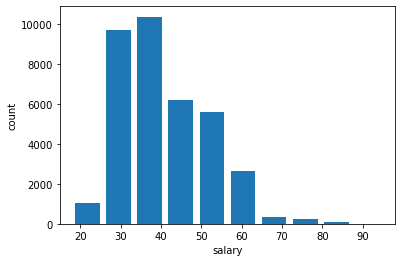

In [35]:
plt.hist(df6.age,rwidth=0.8)
plt.xlabel('salary')
plt.ylabel('count')

In [36]:
df6['age2']=df6['age']**2
df6['salary2']=df6['salary']**2
df6['balance2']=df6['balance']**2
df6['duration2']=df6['duration']**2
df6.head(3)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,y,response,age2,salary2,balance2,duration2
0,58,management,100000,married,tertiary,married-tertiary,1,2143,1,0,cellular,261,1,0,0,3364,10000000000,4592449,68121
1,44,technician,60000,single,secondary,single-secondary,1,29,1,0,cellular,151,1,0,0,1936,3600000000,841,22801
2,33,entrepreneur,120000,married,secondary,married-secondary,1,2,1,1,cellular,76,1,0,0,1089,14400000000,4,5776


In [37]:
Q1=df6.age2.quantile(0.25)
Q3=df6.age2.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(1024.0, 2304.0, 1280.0)

In [38]:
ll1=Q1-IQR*4.5
ul1=Q3+IQR*4.5
df6[(df6.age2<=ll1) | (df6.age2>=ul1)]
df7=df6[(df6.age2>ll1) & (df6.age2<ul1)]
df7.shape

(36186, 19)

In [39]:
Q11=df7.salary2.quantile(0.25)
Q33=df7.salary2.quantile(0.75)
IQR1=Q33-Q11
ll2=Q11-IQR1*1.5
ul2=Q33+IQR1*1.5
df7[(df7.salary2<=ll2) | (df7.salary2>=ul2)]
df8=df7[(df7.salary2>ll2) & (df7.salary2<ul2)]
df8.shape

(35032, 19)

In [40]:
Q111=df8.balance2.quantile(0.25)
Q333=df8.balance2.quantile(0.75)
IQR2=Q333-Q111
ll3=Q111-IQR2*7.5
ul3=Q333+IQR2*7.5
df8[(df8.balance2<=ll3) | (df8.balance2>=ul3)]
df9=df8[(df8.balance2>ll3) & (df8.balance2<ul3)]
df9.shape

(32513, 19)

In [41]:
Q14=df9.duration2.quantile(0.25)
Q34=df9.duration2.quantile(0.75)
IQR4=Q34-Q14
ll4=Q14-IQR4*4.5
ul4=Q34+IQR4*4.5
df9[(df9.duration2<=ll4) |(df9.duration2>=ul4) ]
df10=df9[(df9.duration2>ll4) & (df9.duration2<ul4)]
df10.shape

(30689, 19)

Text(0, 0.5, 'count')

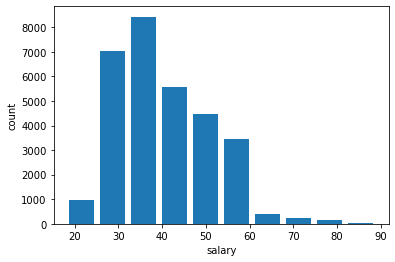

In [42]:
plt.hist(df10.age,rwidth=0.8)
plt.xlabel('salary')
plt.ylabel('count')

In [43]:
#the above kinda is a normal distribution

In [44]:
df10.head(4)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,y,response,age2,salary2,balance2,duration2
0,58,management,100000,married,tertiary,married-tertiary,1,2143,1,0,cellular,261,1,0,0,3364,10000000000,4592449,68121
1,44,technician,60000,single,secondary,single-secondary,1,29,1,0,cellular,151,1,0,0,1936,3600000000,841,22801
5,35,management,100000,married,tertiary,married-tertiary,1,231,1,0,cellular,139,1,0,0,1225,10000000000,53361,19321
6,28,management,100000,single,tertiary,single-tertiary,0,447,1,1,cellular,217,1,0,0,784,10000000000,199809,47089


In [45]:
#dropping the '[%mst2]' columns
df11=df10.drop(['age2','salary2','balance2','duration2'],axis='columns')
df11.sample(3)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,y,response
26355,40,technician,60000,married,secondary,married-secondary,1,4341,0,0,cellular,290,1,0,0
15415,30,admin.,50000,divorced,secondary,divorced-secondary,1,10,1,0,cellular,658,2,1,1
17787,49,blue-collar,20000,married,primary,married-primary,1,2481,0,1,cellular,53,5,0,0


In [46]:
#using label encoder to get the dummy variabes for the job,marital,education,marital-education,contact
from sklearn.preprocessing import LabelEncoder
le_job=LabelEncoder()
le_marital=LabelEncoder()
le_education=LabelEncoder()
le_me=LabelEncoder()
le_contact=LabelEncoder()
df11['job']=le_job.fit_transform(df11['job'])
df11['marital']=le_marital.fit_transform(df11['marital'])
df11['education']=le_education.fit_transform(df11['education'])
df11['marital-education']=le_me.fit_transform(df11['marital-education'])
df11['contact']=le_contact.fit_transform(df11['contact'])
df12=df11.copy()
df12.sample(5)

,age,job,salary,marital,education,marital-education,targeted,balance,housing,loan,contact,duration,campaign,y,response
39265,31,3,100000,2,1,7,1,1310,1,0,0,12,2,0,0
16929,51,0,50000,0,1,1,1,74,1,0,0,79,2,0,0
39672,28,0,50000,2,1,7,1,157,0,0,0,155,3,1,1
27808,28,7,4000,2,1,7,1,101,0,0,0,90,1,0,0
7028,25,1,20000,2,1,7,1,579,1,0,0,225,4,0,0


In [47]:
#preparing my dataset for testing and training
X=df12.drop('response',axis='columns')
X.shape

(30689, 14)

In [48]:
y=df12.response
y.sample(5)

38859    0
4757     0
32608    0
8122     0
34179    0
Name: response, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [50]:
len(X_train)

24551

In [51]:
X_test.shape

(6138, 14)

In [52]:
#using machine learning algorithms to create a model
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [53]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
#         'lasso':{
#             'model':Lasso(),
#             'params':{
#                 'alpha':[1,2],
#                 'selection':['random','cyclic']
#             }
#         },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
    }
#         'random_forest':{
#             'model':RandomForestClassifier(),
#             'params':{
                
#             }
#         },
#         'logistic_regression':{
#             'model':LogisticRegression(),
#             'params':{}
#         }
#     }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [56]:
#find_best_model_using_gridsearchcv(X_train,y_train)

In [55]:
cross_val_score(SVC(),X_train,y_train)

array([0.89981674, 0.9       , 0.9       , 0.9       , 0.9       ])

In [57]:
cross_val_score(LinearRegression(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [58]:
cross_val_score(RandomForestClassifier(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [59]:
cross_val_score(DecisionTreeRegressor(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [60]:
cross_val_score(LogisticRegression(),X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.90307473, 0.901222  , 0.89775967, 0.9       , 0.89857434])

In [63]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [65]:
model.score(X_test,y_test)  #my model is doing extreamly good on my train dataset,we gonna test its perfomance on the test dataset

1.0

In [66]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [67]:
y_test[:10]

5166     0
40623    0
33154    0
20733    0
11009    0
31776    0
20626    0
25095    0
19172    0
39697    1
Name: response, dtype: int64

Text(159.0, 0.5, 'Truth')

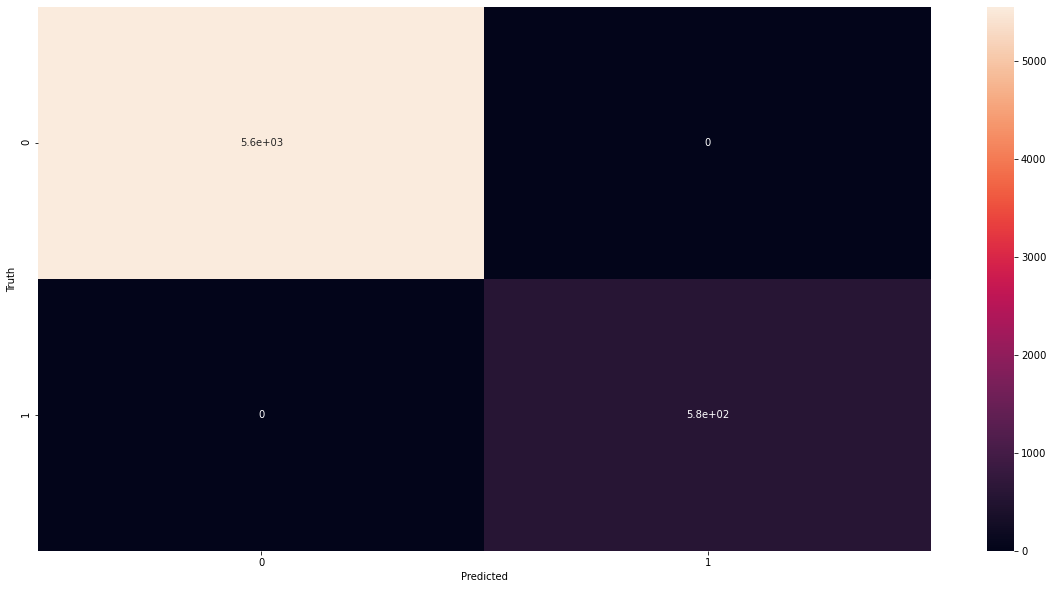

In [68]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
#my model is doing pretty good on doing the predictions (actually it didnt make a single error on predicting results on the X_test)
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5554
           1       1.00      1.00      1.00       584

    accuracy                           1.00      6138
   macro avg       1.00      1.00      1.00      6138
weighted avg       1.00      1.00      1.00      6138



In [70]:
##using deep learning algorithms to create a 2rd model1,n compare their perfomance with model1

In [71]:
#importing important libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [72]:
model1=keras.Sequential([
    keras.layers.Dense(16,input_dim=14,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model1.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
3069/3069 [==============================] - 17s 4ms/step - loss: 227.7102 - accuracy: 0.8699
Epoch 2/100
3069/3069 [==============================] - 12s 4ms/step - loss: 2.7059 - accuracy: 0.8950
Epoch 3/100
3069/3069 [==============================] - 14s 5ms/step - loss: 0.6506 - accuracy: 0.8976
Epoch 4/100
3069/3069 [==============================] - 12s 4ms/step - loss: 0.3671 - accuracy: 0.8991
Epoch 5/100
3069/3069 [==============================] - 13s 4ms/step - loss: 0.4040 - accuracy: 0.8998
Epoch 6/100
3069/3069 [==============================] - 14s 5ms/step - loss: 0.3288 - accuracy: 0.8999
Epoch 7/100
3069/3069 [==============================] - 15s 5ms/step - loss: 0.3258 - accuracy: 0.8999 0s
Epoch 8/100
3069/3069 [==============================] - 16s 5ms/step - loss: 0.3252 - accuracy: 0.9000 1s - ETA: 0s - loss: 0.3251 - accuracy: 
Epoch 9/100
3069/3069 [==============================] - 18s 6ms/step - loss: 0.3252 - accuracy: 0.9000A: 13s -
Epoch 10/1

3069/3069 [==============================] - 19s 6ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 77/100
3069/3069 [==============================] - 15s 5ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 78/100
3069/3069 [==============================] - 15s 5ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 79/100
3069/3069 [==============================] - 15s 5ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 80/100
3069/3069 [==============================] - 14s 5ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 81/100
3069/3069 [==============================] - 15s 5ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 82/100
3069/3069 [==============================] - 14s 5ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 83/100
3069/3069 [==============================] - 13s 4ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 84/100
3069/3069 [==============================] - 10s 3ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 85/100
3069/3069 [==============================] - 10s 3ms/st

In [73]:
##my ANN model is also doing pretty good too,so one can use either machine_learning algorithms or deep_learning algorithms
#to build up a bank_marketing_prediction model 

In [74]:
#testing the model on the test dataset
model1.evaluate(X_test,y_test)

192/192 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.9049


[0.31439831852912903, 0.9048550128936768]

In [75]:
y_pred=model1.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5554
           1       0.00      0.00      0.00       584

    accuracy                           0.90      6138
   macro avg       0.45      0.50      0.48      6138
weighted avg       0.82      0.90      0.86      6138



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(159.0, 0.5, 'Truth')

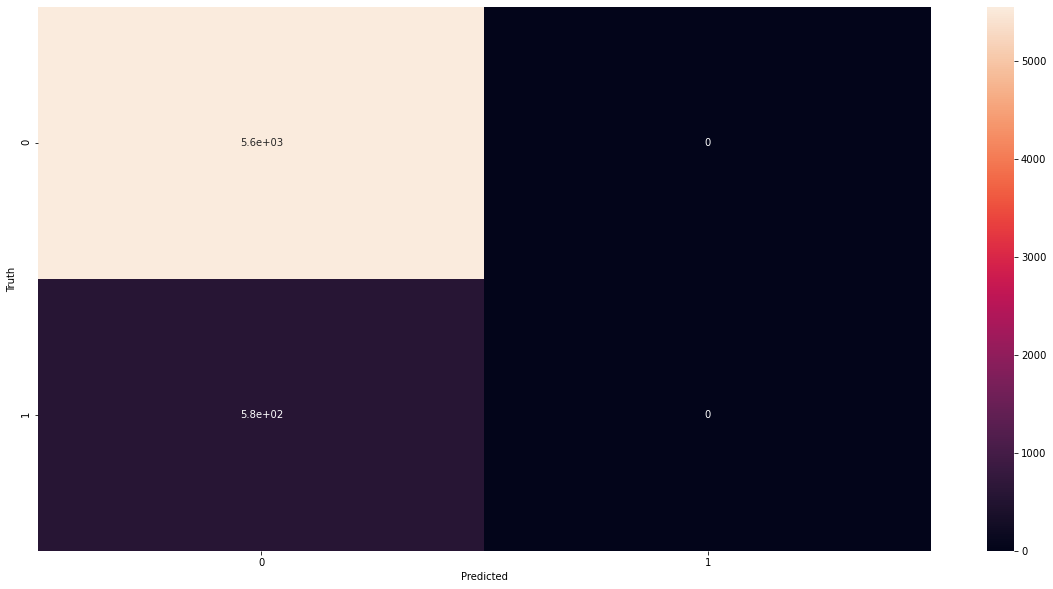

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
#the ANN model aint pretty good on the test dataset,so we rather use DecisionTreeRegressor machine learning algorithm